# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

with open('./signnames.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    sign_mapping = {int(row['ClassId']): row['SignName'] for row in reader}

print(sign_mapping)

{0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing for vehicles over 3.5 metric tons', 11: 'Right-of-way at the next intersection', 12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Vehicles over 3.5 metric tons prohibited', 17: 'No entry', 18: 'General caution', 19: 'Dangerous curve to the left', 20: 'Dangerous curve to the right', 21: 'Double curve', 22: 'Bumpy road', 23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 32: 'End of all speed and passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 36: 'Go straight or right', 37: 'Go straight o

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

<Container object of 43 artists>

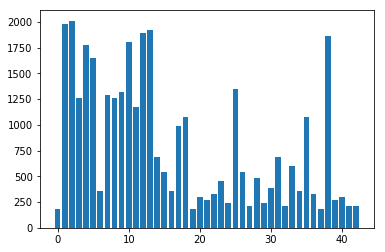

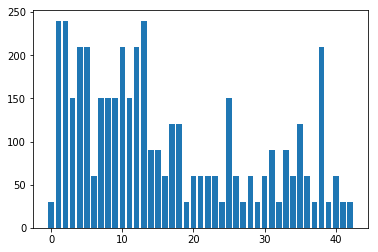

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
bins = np.bincount(y_train)
plt.figure(1)
plt.bar(range(43), bins)

plt.figure(2)
bins_valid = np.bincount(y_valid)
plt.bar(list(range(43)), bins_valid)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

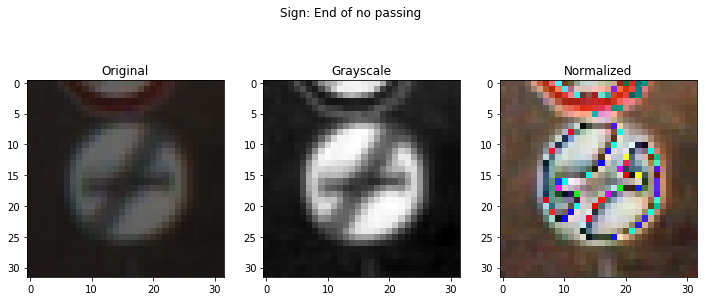

In [4]:
def normalize(x):
    broadcast_shape = (x.shape[0], 1, 1, 1)
    axis = tuple(range(1, len(x.shape)))
    ratios_before_reshape = 2 / (np.max(x, axis=axis) - np.min(x, axis=axis))
    ratio = np.reshape(ratios_before_reshape, broadcast_shape)
    mins_before_reshape = np.min(x, axis=axis)
    return (x - np.reshape(mins_before_reshape, broadcast_shape)) * ratio - 1

def rgb2grayscale(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def preprocess(X):
    gray_added = np.array([np.append(x, np.expand_dims(rgb2grayscale(x), axis=2), axis=2) for x in X])
    normalized = normalize(gray_added)
    return normalized

plt.figure(1, figsize=(12, 5))
plt.suptitle("Sign: {0}".format(sign_mapping[y_train[150]]))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(X_train[10])

plt.subplot(1, 3, 2)
plt.title("Grayscale")
plt.imshow(rgb2grayscale(X_train[10]), cmap="gray")

plt.subplot(1, 3, 3)
plt.title("Normalized")
plt.imshow(normalize(X_train)[10], vmin=-1, vmax=1)

X_train = preprocess(X_train)
X_valid = preprocess(X_valid)
X_test = preprocess(X_test)

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

from tensorflow.python.training import moving_averages
from tensorflow.python.ops import control_flow_ops

MOVING_AVERAGE_DECAY = 0.9997
BN_DECAY = MOVING_AVERAGE_DECAY
BN_EPSILON = 0.001
UPDATE_OPS_COLLECTION = 'mynet-bn-updates'

mu = 0.05
std = 0.1

def variable_summaries(var):
    """Attach a lot of summaries to a Tensor (for TensorBoard visualization)."""
    with tf.name_scope('summaries'):
        mean = tf.reduce_mean(var)
        tf.summary.scalar('mean', mean)
        with tf.name_scope('stddev'):
            stddev = tf.sqrt(tf.reduce_mean(tf.square(var - mean)))
        tf.summary.scalar('stddev', stddev)
        tf.summary.scalar('max', tf.reduce_max(var))
        tf.summary.scalar('min', tf.reduce_min(var))
        tf.summary.histogram('histogram', var)

def conv(x, filter_size, filter_num, stride_step=1, padding='SAME'):
    _, _, _, depth = x.get_shape().as_list()
    with tf.device("/cpu:0"):
        with tf.name_scope("weights"):
            filter_weights = tf.Variable(tf.truncated_normal((filter_size, filter_size, depth, filter_num), mu, std))
            variable_summaries(filter_weights)
        with tf.name_scope("biases"):
            filter_biases = tf.Variable(tf.zeros(filter_num))
            variable_summaries(filter_biases)
    stride = (1, stride_step, stride_step, 1)
    return tf.nn.bias_add(tf.nn.conv2d(x, filter_weights, stride, padding), filter_biases)

def pool(x):
    return tf.nn.max_pool(x, (1, 2, 2, 1), (1, 2, 2, 1), 'VALID')

def fc(x, output_num):
    _, input_num = x.get_shape().as_list()
    with tf.name_scope("weights"):
        fc_weights = tf.Variable(tf.truncated_normal((input_num, output_num), mu, std))
        variable_summaries(fc_weights)
    with tf.name_scope("biases"):
        fc_biases = tf.Variable(tf.zeros(output_num))
        variable_summaries(fc_biases)
    return tf.nn.bias_add(tf.matmul(x, fc_weights), fc_biases)

# reference: https://github.com/ry/tensorflow-resnet/blob/master/resnet.py#L227
def batch_norm(x, is_training):
    x_shape = x.get_shape()
    params_shape = x_shape[-1:]

    axis = list(range(len(x_shape) - 1))

    with tf.name_scope("beta"):
        beta = tf.Variable(tf.zeros(params_shape))
        variable_summaries(beta)
    with tf.name_scope("gamma"):
        gamma = tf.Variable(tf.ones(params_shape))
        variable_summaries(gamma)

    with tf.name_scope("moving_mean"):
        moving_mean = tf.Variable(tf.zeros(params_shape), trainable=False)
        variable_summaries(moving_mean)
    with tf.name_scope("moving_variance"):
        moving_variance = tf.Variable(tf.ones(params_shape), trainable=False)
        variable_summaries(moving_variance)

    # These ops will only be preformed when training.
    mean, variance = tf.nn.moments(x, axis)
    update_moving_mean = moving_averages.assign_moving_average(
        moving_mean, mean, BN_DECAY)
    update_moving_variance = moving_averages.assign_moving_average(
        moving_variance, variance, BN_DECAY)
    tf.add_to_collection(UPDATE_OPS_COLLECTION, update_moving_mean)
    tf.add_to_collection(UPDATE_OPS_COLLECTION, update_moving_variance)

    mean, variance = control_flow_ops.cond(
        is_training, lambda: (mean, variance),
        lambda: (moving_mean, moving_variance))

    x = tf.nn.batch_normalization(x, mean, variance, beta, gamma, BN_EPSILON)
    
    return x

def conv_bn_relu(x, filter_size, filter_num, stride_step=1, is_training=None):
    res = conv(x, filter_size, filter_num, stride_step=stride_step)
    with tf.device("/cpu:0"):
        tf.summary.histogram('pre_batch_normalization', res)
    res = batch_norm(res, is_training)
    with tf.device("/cpu:0"):
        tf.summary.histogram('pre_activations', res)
    res = tf.nn.elu(res)
    with tf.device("/cpu:0"):
        tf.summary.histogram('activations', res)
    return res

def inception(x, num_layer_1, num_layer_2, stride_step=1, is_training=None):
    with tf.variable_scope('branch1x1'):
        branch1x1 = conv_bn_relu(x, 1, num_layer_1, stride_step=stride_step, is_training=is_training)
    with tf.variable_scope('branch3x3'):
        branch3x3 = conv_bn_relu(x, 1, num_layer_1, is_training=is_training)
        branch3x3 = conv_bn_relu(branch3x3, 3, num_layer_2, is_training=is_training)
        branch3x3 = conv_bn_relu(branch3x3, 3, num_layer_2, stride_step=stride_step, is_training=is_training)
    with tf.variable_scope('branch5x5'):
        branch5x5 = conv_bn_relu(x, 1, num_layer_1, is_training=is_training)
        branch5x5 = conv_bn_relu(branch5x5, 5, num_layer_2, stride_step=stride_step, is_training=is_training)
    with tf.variable_scope('branch_pool'):
        branch_pool = tf.nn.avg_pool(x, [1, 3, 3, 1], [1, 1, 1, 1], 'SAME')
        branch_pool = conv_bn_relu(branch_pool, 1, num_layer_1, stride_step=stride_step, is_training=is_training)
    return tf.concat([branch1x1, branch3x3, branch5x5, branch_pool], 3)

class MyNet(object):
    def model(self, x, is_training, keep_prob):
        with tf.variable_scope('inception1'):
            self.conv1 = inception(x, 16, 16, stride_step=2, is_training=is_training)
    
        with tf.variable_scope('inception2'):
            self.conv2 = inception(self.conv1, 32, 32, stride_step=2, is_training=is_training)

        with tf.variable_scope('inception3'):
            self.conv3 = tf.nn.max_pool(self.conv2, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

        with tf.variable_scope('inception4'):
            self.conv4 = inception(self.conv3, 64, 64, stride_step=2, is_training=is_training)

        with tf.variable_scope('avg_pool'):
            shape = self.conv4.get_shape().as_list()
            self.final_pool = tf.nn.avg_pool(self.conv4, [1] + shape[1:3] + [1], [1] + shape[1:3] + [1], padding='VALID')
            self.final_pool = tf.nn.dropout(self.final_pool, keep_prob=keep_prob)

        with tf.variable_scope('fc'):
            self.fc0 = flatten(self.final_pool)

            logits = fc(self.fc0, 43)

        return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
learning_rate = 0.001
gama = 0

X = tf.placeholder(tf.float32, shape=(None, 32, 32, 4), name='X')
y = tf.placeholder(tf.int32, shape=(None,), name='y')
y_one_hot = tf.one_hot(y, n_classes, name='y_one_hot')
global_step = tf.Variable(0, name='global_step', trainable=False)

is_training = tf.placeholder(tf.bool, name='is_training')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

mynet = MyNet()
logits = mynet.model(X, is_training, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_one_hot)
regularization = sum([tf.nn.l2_loss(var)
                      for var in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
                      if "weights" in var.name and "Adam" not in var.name])
with tf.name_scope("cross_entropy"):
    loss_op = tf.reduce_mean(cross_entropy) + gama*regularization
    tf.summary.scalar("cross_entropy", loss_op)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# reference: https://github.com/ry/tensorflow-resnet/blob/master/resnet_train.py#L66
batchnorm_updates = tf.get_collection(UPDATE_OPS_COLLECTION)
batchnorm_updates_op = tf.group(*batchnorm_updates)
train_op = tf.group(optimizer.minimize(loss_op, global_step=global_step), batchnorm_updates_op)

In [7]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation,
                            feed_dict={X: batch_x, y: batch_y, is_training: False, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCH 1 ...
Validation Accuracy = 0.07007
Train Accuracy = 0.05276
Loss = 4.16757
Time Duration of Training Epoch: 14.926 seconds
Time Duration of Validation: 0.461 seconds
Time Duration of Train Accuracy: 2.333 seconds

EPOCH 11 ...
Validation Accuracy = 0.03401
Train Accuracy = 0.03621
Loss = 0.07412
Time Duration of Training Epoch: 13.772 seconds
Time Duration of Validation: 0.302 seconds
Time Duration of Train Accuracy: 2.359 seconds

EPOCH 21 ...
Validation Accuracy = 0.12880
Train Accuracy = 0.13446
Loss = 0.01702
Time Duration of Training Epoch: 13.864 seconds
Time Duration of Validation: 0.307 seconds
Time Duration of Train Accuracy: 2.373 seconds

EPOCH 31 ...
Validation Accuracy = 0.22698
Train Accuracy = 0.25208
Loss = 0.00646
Time Duration of Training Epoch: 13.851 seconds
Time Duration of Validation: 0.304 seconds
Time Duration of Train Accuracy: 2.370 seconds

EPOCH 41 ...
Validation Accuracy = 0.38005
Train Accuracy = 0.42889
Loss = 0.00482
Time Duration of Training Epoc

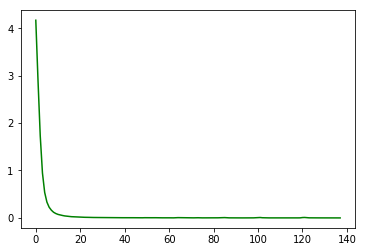

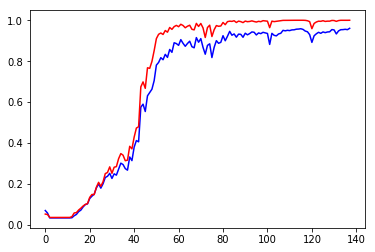

In [8]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time
from datetime import datetime

BATCH_SIZE = 512
EPOCH_NUM = 200

saver = tf.train.Saver()
config = tf.ConfigProto(log_device_placement=True)

logdir = './summaries/{0}'.format(datetime.now().isoformat())
model_path = "./inception-fine-tuned"

with tf.Session(config=config) as sess:
    sess.run(tf.global_variables_initializer())

    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter(logdir, sess.graph)
    
    losses = []
    validation_accuracies = []
    train_accuracies = []
    for i in range(EPOCH_NUM):
        X_train, y_train = shuffle(X_train, y_train)
        loss_total = 0.
        before_train = time.time()
        for offset in range(0, n_train, BATCH_SIZE):
            end = offset + BATCH_SIZE
            X_batch, y_batch = X_train[offset:end], y_train[offset:end]
            loss_batch, _ = sess.run([loss_op, train_op],
                                      feed_dict={X: X_batch, y: y_batch, is_training: True, keep_prob: 0.4})
            after = time.time()
            loss_total += loss_batch * len(X_batch)
        after_train = time.time()
        
        loss = loss_total / n_train
        losses.append(loss)
        
        before_valid = time.time()
        validation_accuracy = evaluate(X_valid, y_valid)
        validation_accuracies.append(validation_accuracy)
        after_valid = time.time()
        
        before_test = time.time()
        train_accuracy = evaluate(X_train, y_train)
        train_accuracies.append(train_accuracy)
        after_test = time.time()
        
        if i % 10 == 0:
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.5f}".format(validation_accuracy))
            print("Train Accuracy = {:.5f}".format(train_accuracy))
            print("Loss = {:.5f}".format(loss_total / n_train))
            print("Time Duration of Training Epoch: {:.3f} seconds".format(after_train - before_train))
            print("Time Duration of Validation: {:.3f} seconds".format(after_valid - before_valid))
            print("Time Duration of Train Accuracy: {:.3f} seconds".format(after_test - before_test))
            print()

        if i % 10 == 0:
            saver.save(sess, "{0}/traffic".format(model_path), global_step=global_step)
        
        if validation_accuracy > 0.96:
            print("Validation accuracy over 96% at epoch #{1}, stop training.".format(validation_accuracy, i))
            break
        
    saver.save(sess, "{0}/traffic".format(model_path), global_step=global_step)
    print("Model saved.")

import os
def write_backup(path, data):
    with open(path, "w") as f:
        for s in data:
            f.write(str(s))
            f.write(os.linesep)

write_backup("{0}/losses.txt".format(logdir), losses)
plt.figure(1)
plt.plot(range(len(losses)), losses, 'g')

write_backup("{0}/validation_accuracies.txt".format(logdir), validation_accuracies)
write_backup("{0}/train_accuracies.txt".format(logdir), train_accuracies)
plt.figure(2)
plt.plot(range(len(validation_accuracies)), validation_accuracies, 'b',
         range(len(train_accuracies)), train_accuracies, 'r')

In [9]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.950


In [10]:
sorted(enumerate(validation_accuracies), key=lambda x: x[1], reverse=True)[:10]

[(137, 0.9605442160381481),
 (115, 0.95850340822656677),
 (114, 0.95691610025981111),
 (113, 0.95623582869159929),
 (135, 0.95578231287110693),
 (116, 0.95532880237583673),
 (129, 0.95442176759918806),
 (134, 0.95419501447353239),
 (136, 0.95396825761751791),
 (133, 0.95374149708520795)]

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

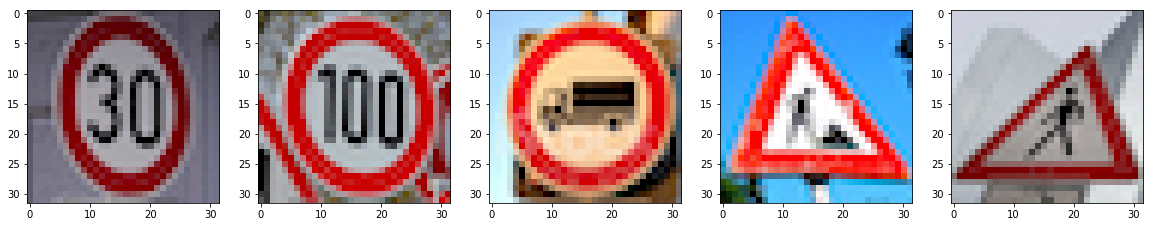

In [11]:
from PIL import Image

images = [Image.open("./downloaded/{0}.jpg".format(i)) for i in range(1, 6)]
plt.figure(1, figsize=(20, 20))
for i, img in enumerate(images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)

### Predict the Sign Type for Each Image

In [12]:
preprocessed_images = preprocess(np.array([np.asarray(img) for img in images]))

In [13]:
predicted = []
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    for img in preprocessed_images:
        img = np.expand_dims(img, 0)
        probs = sess.run(logits, feed_dict={X: img, is_training: False, keep_prob: 1.0})
        label = np.argmax(probs)
        predicted.append(label)
        print("Predicted result: ", sign_mapping[label])

Predicted result:  Speed limit (30km/h)
Predicted result:  Speed limit (30km/h)
Predicted result:  Vehicles over 3.5 metric tons prohibited
Predicted result:  Road work
Predicted result:  General caution


### Analyze Performance

In [14]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
correct_labels = [1, 7, 16, 25, 27]
accuracy = sum(map(lambda x: x[0] == x[1], zip(correct_labels, predicted)))
print("The accuracy is {0}".format(accuracy / len(correct_labels)))

The accuracy is 0.6


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

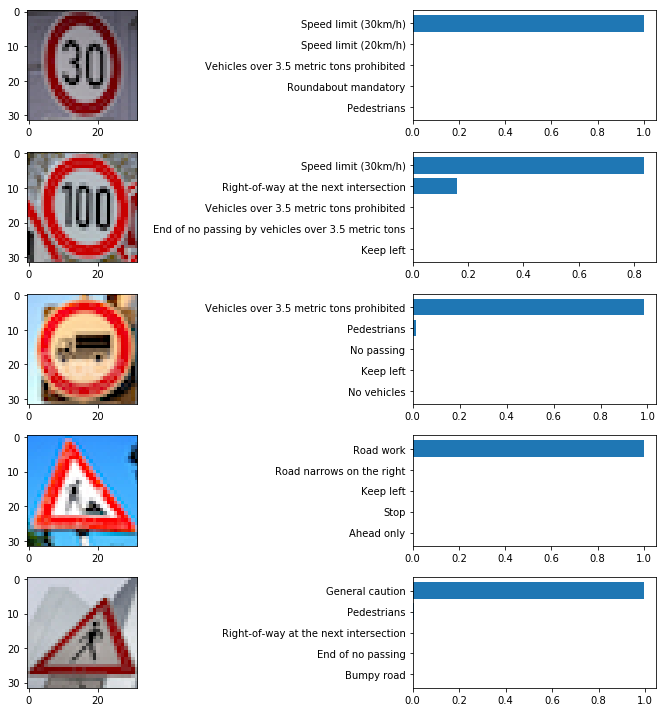

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    plt.figure(1, figsize=(10, 10))
    for i, img in enumerate(preprocessed_images):
        exp_img = np.expand_dims(img, 0)
        probs = sess.run(tf.nn.top_k(tf.nn.softmax(logits), 5), feed_dict={X: exp_img, is_training: False, keep_prob: 1.0})
        plt.subplot(5, 2, 2*i + 1)
        plt.imshow(images[i], vmin=-1, vmax=1)
        plt.subplot(5, 2, 2*i + 2)
        plt.barh(np.arange(5, 0, -1), probs[0][0])
        plt.yticks(np.arange(5, 0, -1), [sign_mapping[n] for n in probs[1][0]])
        plt.tight_layout()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [16]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1, session=sess):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=session,feed_dict={X : image_input, is_training: False, keep_prob: 1.0})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(min(featuremaps, 96)):
        plt.subplot(12,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

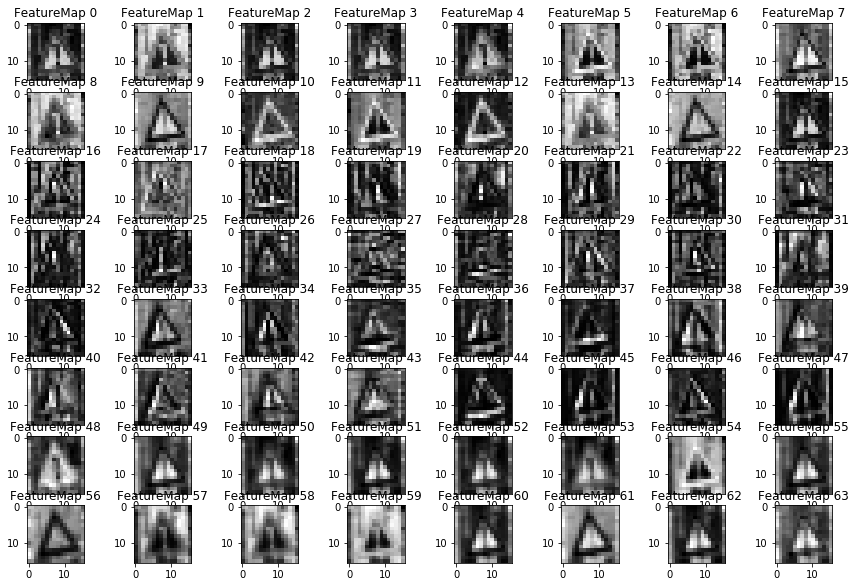

In [17]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    outputFeatureMap(np.array([X_train[100]]), mynet.conv1, session=sess)

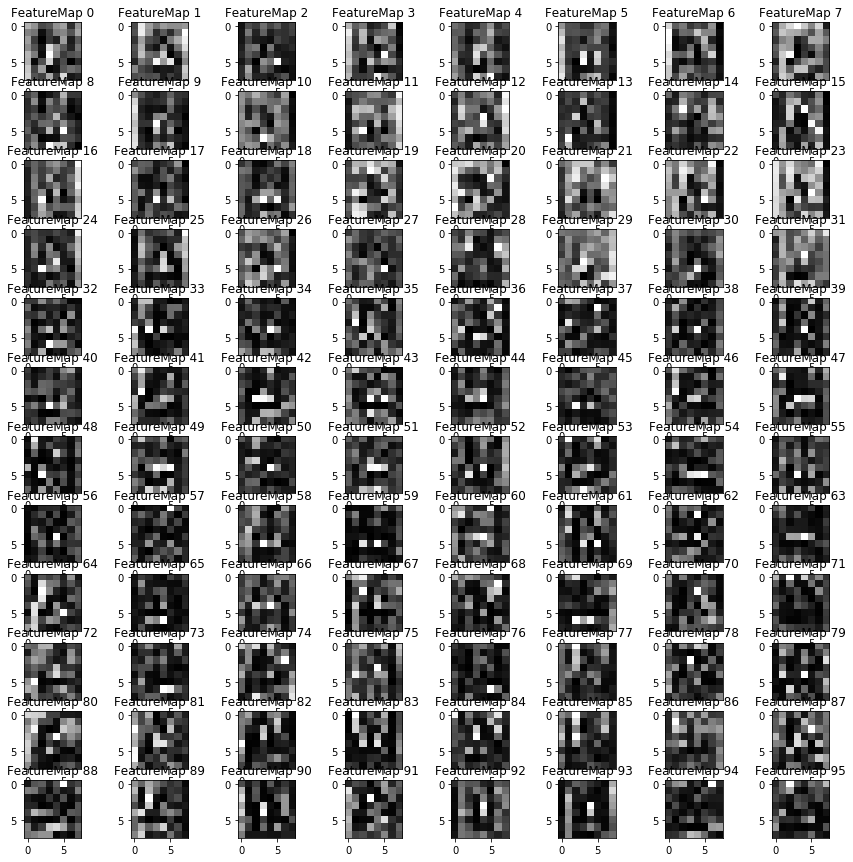

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint(model_path))
    outputFeatureMap(np.array([X_train[100]]), mynet.conv2, session=sess)

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

From the result of 16th code block, we can see that neurons in the first Inception Module are trying to look for some basic shape. The way I understand the activation map is that the bright pixels means the neuron is activated in these pixel, and dark ones means unactivated. So it is clear that the neuron FeatureMap_14 is looking for some triangle shape, and FeatureMap_4 is looking for some unchanged color.

However, it is not that clear to see what a neuron is looking for in the high level Inception Module, which is shown in the result of 17th code block. FeatureMap 5 may be looking for something NOT a sign, while others are not easy to guess.

This kind of make sense because we human can understand objects as some abstract concept that may not be describable.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 